In [3]:
import pandas as pd
import os

In [4]:
folder_path = 'csv'


In [5]:
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
print(csv_files)  # optional, to check all files found


['ml_engineer.csv', 'mobiledevFinal.csv', 'blockchain_developer_finals.csv', 'backendFinal.csv', 'businees_intelligence_developerss.csv', 'security_analyst.csv', 'ml_engineers.csv', 'data_engineer_finals.csv', 'web3_developer_finals.csv', 'fullstackFinal.csv', 'data_analyst_finals.csv', 'business_analyst_Final.csv', 'frontendFinal.csv', 'mlopss.csv', 'data_scientist_finals.csv']


In [6]:
# Create an empty list to store dataframes
dfs = []

for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs, ignore_index=True)


In [7]:
combined_df.to_csv('combined.csv', index=False)
print("All CSVs have been combined into combined.csv")


All CSVs have been combined into combined.csv


In [8]:
df  = pd.read_csv("combined.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   current_position       4764 non-null   object 
 1   current_company        4749 non-null   object 
 2   years_of_experience    4738 non-null   float64
 3   total_skills           4813 non-null   object 
 4   education_degree       4616 non-null   object 
 5   education_institution  4723 non-null   object 
 6   certifications         2806 non-null   object 
 7   city                   4614 non-null   object 
 8   state                  4741 non-null   object 
 9   country                4850 non-null   object 
 10  profile_type           4850 non-null   object 
dtypes: float64(1), object(10)
memory usage: 416.9+ KB


In [10]:
df.head()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type
0,ML Engineer,Adobe,11.0,"Matlab, Electronics, C, C++, Electrical Engine...",Bachelor of Engineering (BE),Anna University,NaN,Bengaluru,Karnataka,India,ml_engineer
1,Machine Learning Engineer,Sarvam,7.0,"Artificial Intelligence (AI), Machine Learning...",BSc - Bachelor of Science,"St. Stephen's College, Delhi",4-Week Virtual Internship Program on Generativ...,Bengaluru,Karnataka,India,ml_engineer
2,Python Software Developer,Wipzent,3.1,"Artificial Intelligence (AI), Django, Pandas (...",Bsc in data science,Techno India University,NaN,Bengaluru,Karnataka,India,ml_engineer
3,Machine Learning Engineer,Smart Data Solutions,9.2,"Semantic Search, Model Selection, Decision-Mak...",Predictive Analytics for Business,Udacity,"SQL (Basic) Certificate, Databases for Develop...",Chennai,Tamil Nadu,India,ml_engineer
4,Director - Applied AI,Krutrim,15.6,"Coaching, Responsible AI, Analytical Skills, T...",Doctor of Philosophy (Ph.D.),Tampere University,"Neural Networks for Machine Learning, Machine ...",Bengaluru,Karnataka,India,ml_engineer


In [11]:
df['profile_type'].unique()

array(['ml_engineer', 'mobiledevFinal', 'blockchain_developers',
       'backendFinal', 'businees_intelligence_developerss',
       'security_analyst', 'ml_engineers', 'data_engineers',
       'web3_developers', 'fullstackFinal', 'data_analysts',
       'business_analyst_Final', 'frontendFinal', 'mlopss',
       'data_scientists'], dtype=object)

In [12]:
print(len(df['total_skills'].unique()))

3729


In [13]:
df.isnull().sum() 

current_position           86
current_company           101
years_of_experience       112
total_skills               37
education_degree          234
education_institution     127
certifications           2044
city                      236
state                     109
country                     0
profile_type                0
dtype: int64

In [14]:
df.duplicated().sum()   # Number of duplicate rows

244

In [15]:
df.drop_duplicates(inplace=True) 

In [16]:
df['num_skills'] = df['total_skills'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df['num_skills'].describe()

count    4606.000000
mean       30.060573
std        19.424869
min         0.000000
25%        16.000000
50%        26.000000
75%        41.000000
max       110.000000
Name: num_skills, dtype: float64

<Axes: xlabel='profile_type', ylabel='num_skills'>

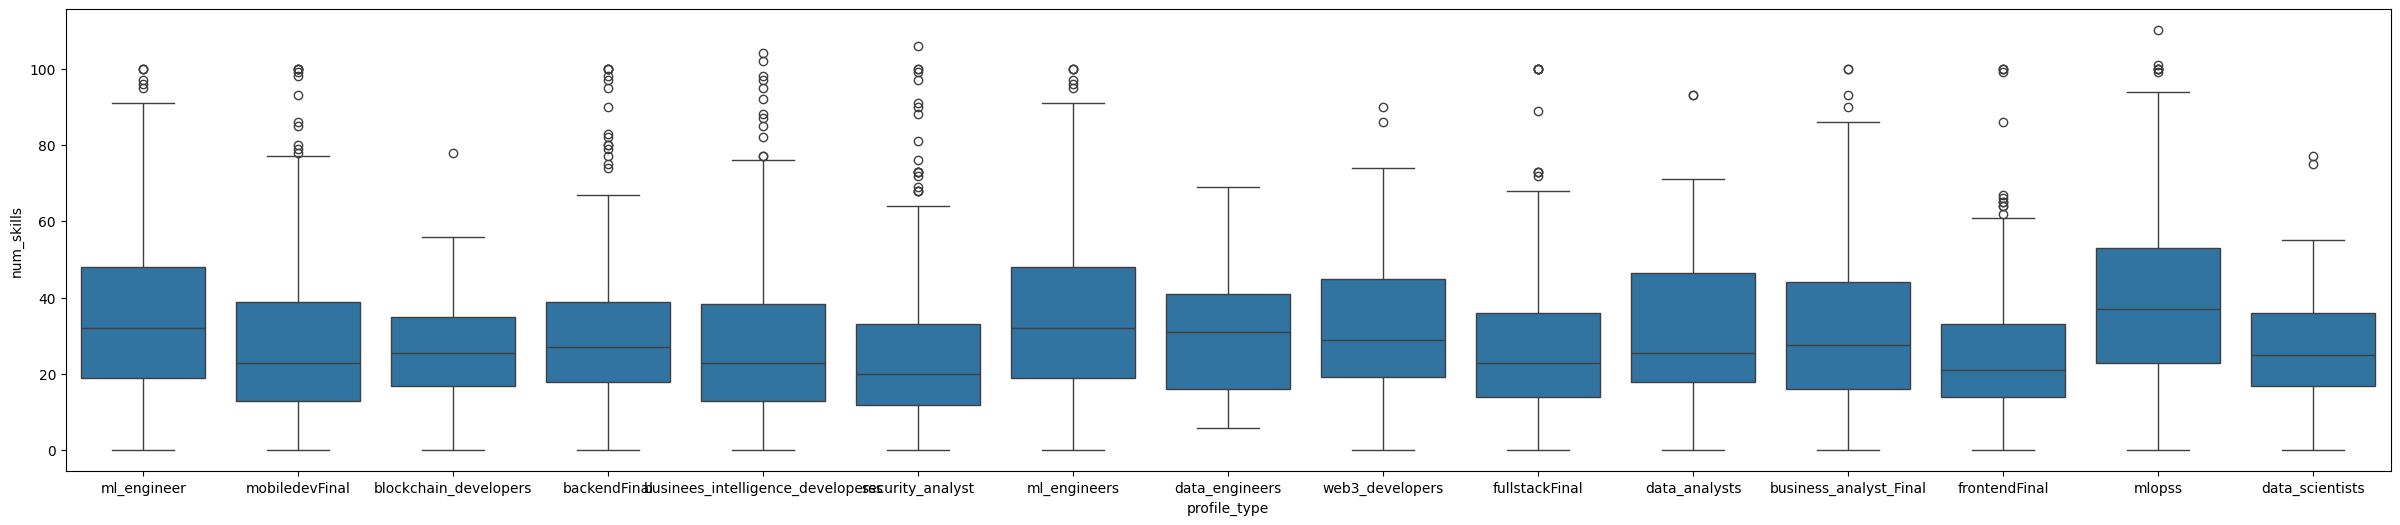

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
df[['current_position', 'num_skills', 'years_of_experience']].head()
plt.figure(figsize=(30,6))  
sns.boxplot(x='profile_type', y='num_skills', data=df)

In [18]:
mapping = {
    'ml_engineer':'ML', 'ml_engineers':'ML',
    'data_scientists':'DS', 'data_analysts':'DA',
    'business_analyst_Final':'BA', 
    'businees_intelligence_developerss':'BI_Dev',
    'backendFinal':'Backend_Dev', 'frontendFinal':'Frontend_Dev',
    'fullstackFinal':'Fullstack_Dev', 'mobiledevFinal':'Mobile_Dev',
    'blockchain_developers':'Blockchain_Dev', 'web3_developers':'Web3',
    'security_analyst':'Security_Analyst', 'mlopss':'MLOps_Eng'
}

df['profile_type'] = df['profile_type'].replace(mapping)


In [19]:
import plotly.express as px

# Create interactive boxplot
fig = px.box(
    df, 
    x='profile_type', 
    y='num_skills', 
    color='profile_type',          # Different colors per profile
    points="all",                  # Show all data points
    hover_data=['current_position','years_of_experience','current_company'],  # Show extra info on hover
    title="Distribution of Skills by Profile Type"
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Profile Type",
    yaxis_title="Number of Skills",
    xaxis_tickangle=-45,           # Rotate x-axis labels
    showlegend=False,              # Hide legend (optional)
    template="plotly_white"        # Clean background
)

fig.show()


In [20]:
print(len(df['current_company'].unique()))

2088


In [21]:
df.head()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type,num_skills
0,ML Engineer,Adobe,11.0,"Matlab, Electronics, C, C++, Electrical Engine...",Bachelor of Engineering (BE),Anna University,NaN,Bengaluru,Karnataka,India,ML,19
1,Machine Learning Engineer,Sarvam,7.0,"Artificial Intelligence (AI), Machine Learning...",BSc - Bachelor of Science,"St. Stephen's College, Delhi",4-Week Virtual Internship Program on Generativ...,Bengaluru,Karnataka,India,ML,23
2,Python Software Developer,Wipzent,3.1,"Artificial Intelligence (AI), Django, Pandas (...",Bsc in data science,Techno India University,NaN,Bengaluru,Karnataka,India,ML,11
3,Machine Learning Engineer,Smart Data Solutions,9.2,"Semantic Search, Model Selection, Decision-Mak...",Predictive Analytics for Business,Udacity,"SQL (Basic) Certificate, Databases for Develop...",Chennai,Tamil Nadu,India,ML,38
4,Director - Applied AI,Krutrim,15.6,"Coaching, Responsible AI, Analytical Skills, T...",Doctor of Philosophy (Ph.D.),Tampere University,"Neural Networks for Machine Learning, Machine ...",Bengaluru,Karnataka,India,ML,20


In [22]:
df.head()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type,num_skills
0,ML Engineer,Adobe,11.0,"Matlab, Electronics, C, C++, Electrical Engine...",Bachelor of Engineering (BE),Anna University,NaN,Bengaluru,Karnataka,India,ML,19
1,Machine Learning Engineer,Sarvam,7.0,"Artificial Intelligence (AI), Machine Learning...",BSc - Bachelor of Science,"St. Stephen's College, Delhi",4-Week Virtual Internship Program on Generativ...,Bengaluru,Karnataka,India,ML,23
2,Python Software Developer,Wipzent,3.1,"Artificial Intelligence (AI), Django, Pandas (...",Bsc in data science,Techno India University,NaN,Bengaluru,Karnataka,India,ML,11
3,Machine Learning Engineer,Smart Data Solutions,9.2,"Semantic Search, Model Selection, Decision-Mak...",Predictive Analytics for Business,Udacity,"SQL (Basic) Certificate, Databases for Develop...",Chennai,Tamil Nadu,India,ML,38
4,Director - Applied AI,Krutrim,15.6,"Coaching, Responsible AI, Analytical Skills, T...",Doctor of Philosophy (Ph.D.),Tampere University,"Neural Networks for Machine Learning, Machine ...",Bengaluru,Karnataka,India,ML,20


In [23]:
df.to_json("combined_output.json", orient="records", lines=True)


In [24]:
df['years_of_experience'].max()

47.9

In [25]:
df['years_of_experience'].describe()

count    4498.000000
mean        5.914495
std         4.132801
min         0.100000
25%         3.100000
50%         5.000000
75%         7.800000
max        47.900000
Name: years_of_experience, dtype: float64

In [26]:
df.size

55272

In [27]:
df.tail()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type,num_skills
4845,Data Scientist,Aroha Technologies,13.8,"SQL / RDBMS, Prompt Engineering, Mentoring, Na...",Bachelor of Engineering - BE,Visvesvaraya Technological University,"Clinical Trial Data Analysis using SAS , Clini...",Bengaluru,Karnataka,India,DS,28
4846,Senior Data Scientist,PayPal,10.0,"Time Series Forecasting, Pattern Recognition, ...",Post Graduation Program,Great Learning,NaN,Bengaluru,Karnataka,India,DS,22
4847,Junior Data Scientist,LTIMindtree,1.8,"PyTorch, PySpark, GCP, Google Maps API, Google...",Bachelor of Technology - BTech,Graphic Era Deemed to be University,"AWS Certified AI Practitioner, Prompt Engineer...",Bengaluru,Karnataka,India,DS,41
4848,Data Scientist,Citi,8.2,NaN,Master of Technology - MTech,"Indian Statistical Institute, Kolkata",NaN,Bengaluru,Karnataka,India,DS,0
4849,Data Scientist,Genpact,2.2,"R (Programming Language), Object-Oriented Prog...",Master of Computer Applications - MCA,National Institute of Technology Warangal,"Problem Solving(Intermediate) , Problem solvin...",Bengaluru,Karnataka,India,DS,22


In [28]:
df.head()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type,num_skills
0,ML Engineer,Adobe,11.0,"Matlab, Electronics, C, C++, Electrical Engine...",Bachelor of Engineering (BE),Anna University,NaN,Bengaluru,Karnataka,India,ML,19
1,Machine Learning Engineer,Sarvam,7.0,"Artificial Intelligence (AI), Machine Learning...",BSc - Bachelor of Science,"St. Stephen's College, Delhi",4-Week Virtual Internship Program on Generativ...,Bengaluru,Karnataka,India,ML,23
2,Python Software Developer,Wipzent,3.1,"Artificial Intelligence (AI), Django, Pandas (...",Bsc in data science,Techno India University,NaN,Bengaluru,Karnataka,India,ML,11
3,Machine Learning Engineer,Smart Data Solutions,9.2,"Semantic Search, Model Selection, Decision-Mak...",Predictive Analytics for Business,Udacity,"SQL (Basic) Certificate, Databases for Develop...",Chennai,Tamil Nadu,India,ML,38
4,Director - Applied AI,Krutrim,15.6,"Coaching, Responsible AI, Analytical Skills, T...",Doctor of Philosophy (Ph.D.),Tampere University,"Neural Networks for Machine Learning, Machine ...",Bengaluru,Karnataka,India,ML,20


In [30]:
# Clean numeric column
df["years_of_experience"] = pd.to_numeric(df["years_of_experience"], errors="coerce").fillna(0)


In [31]:
text_columns = [
    "education_degree", "education_institution", 
    "total_skills", "certifications", 
    "city", "state"
]

for col in text_columns:
    df[col] = df[col].fillna("Unknown").astype(str)


In [ ]:
# Clean up
df.fillna("Unknown", inplace=True)

# Explicitly convert all to string for safety
df["total_skills"] = df["total_skills"].astype(str)
df["certifications"] = df["certifications"].astype(str)
df["education_degree"] = df["education_degree"].astype(str)
df["education_institution"] = df["education_institution"].astype(str)
df["city"] = df["city"].astype(str)
df["state"] = df["state"].astype(str)

# Target
y = df["profile_type"]

# Features
X = df[[
    "years_of_experience",
    "education_degree",
    "education_institution",
    "total_skills",
    "certifications",
    "city",
    "state"
]]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature groups
numeric_features = ["years_of_experience"]
categorical_features = ["education_degree", "education_institution", "city", "state"]

# Separate text transformers
text_transformer_skills = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words='english', max_features=300))
])
text_transformer_certs = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words='english', max_features=200))
])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("skills", text_transformer_skills, "total_skills"),
        ("certs", text_transformer_certs, "certifications"),
    ]
)

# Full pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split + Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'zero_division'

In [38]:
import requests
import numpy as np

OLLAMA_URL = "http://localhost:11434/api/embed"
MODEL_NAME = "bge-m3"

def embed_texts(texts):
    r = requests.post(OLLAMA_URL, json={"model": MODEL_NAME, "input": texts})
    r.raise_for_status()
    return np.array(r.json()["embeddings"])

# Example usage
df["skills_emb"] = embed_texts(df["total_skills"].fillna("Unknown").tolist()).tolist()



In [39]:
from sklearn.cluster import KMeans
import numpy as np

X_skills = np.vstack(df["skills_emb"])  # your existing embeddings
kmeans = KMeans(n_clusters=7, random_state=42)
df["skill_cluster"] = kmeans.fit_predict(X_skills)


In [61]:
# Count how many profiles per cluster
print(df["skill_cluster"].value_counts())

# See what job types dominate each cluster
print(df.groupby("skill_cluster")["profile_type"].value_counts().head(60))


skill_cluster
6    872
5    722
3    718
4    671
2    630
1    583
0    410
Name: count, dtype: int64
skill_cluster  profile_type    
0              Security_Analyst    395
               BA                    4
               Mobile_Dev            4
               ML                    2
               MLOps_Eng             2
               BI_Dev                1
               Blockchain_Dev        1
               Web3                  1
1              Mobile_Dev          259
               Frontend_Dev         96
               Fullstack_Dev        96
               Backend_Dev          57
               Blockchain_Dev       19
               ML                   16
               Web3                 15
               BA                    8
               MLOps_Eng             7
               Security_Analyst      5
               data_engineers        3
               BI_Dev                2
2              ML                  372
               MLOps_Eng           140
       

In [63]:
for i in range(7):
    cluster_data = df[df["skill_cluster"] == i]
    skills = ", ".join(cluster_data["total_skills"].astype(str).values)
    skill_list = [s.strip().lower() for s in skills.split(",")]
    
    from collections import Counter
    top_skills = Counter(skill_list).most_common(10)
    print(f"\nCluster {i} — Top Skills:")
    for skill, count in top_skills:
        print(f"  {skill}: {count}")



Cluster 0 — Top Skills:
  cybersecurity: 224
  security information and event management (siem): 144
  information security: 128
  malware analysis: 126
  splunk: 126
  vulnerability assessment: 125
  network security: 125
  incident response: 123
  communication: 108
  security operations center: 103

Cluster 1 — Top Skills:
  javascript: 342
  cascading style sheets (css): 290
  java: 289
  html: 280
  git: 266
  react.js: 229
  problem solving: 223
  communication: 215
  software development: 211
  sql: 207

Cluster 2 — Top Skills:
  python (programming language): 503
  machine learning: 473
  sql: 416
  deep learning: 343
  amazon web services (aws): 321
  natural language processing (nlp): 320
  data analysis: 315
  data science: 313
  artificial intelligence (ai): 283
  large language models (llm): 270

Cluster 3 — Top Skills:
  javascript: 678
  cascading style sheets (css): 595
  react.js: 572
  html: 462
  html5: 430
  node.js: 320
  front-end development: 296
  git: 267
  ty

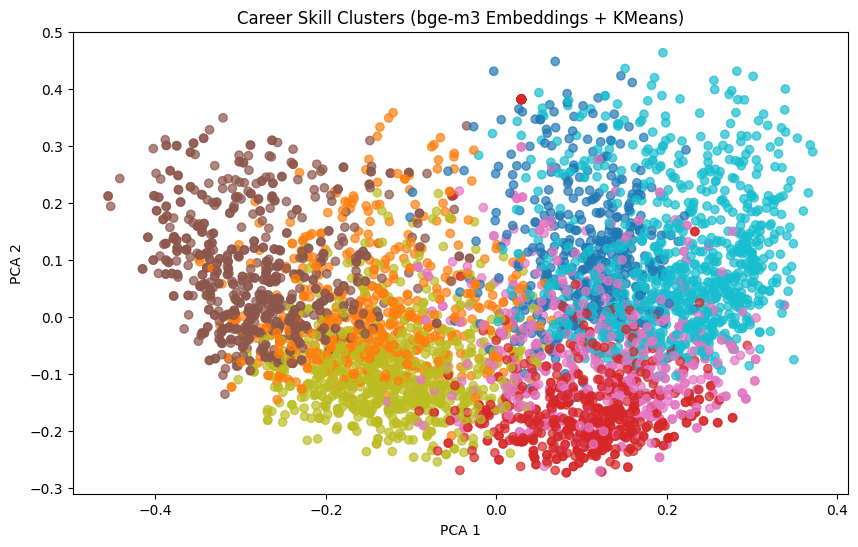

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X_skills)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:,0], reduced[:,1], c=df["skill_cluster"], cmap='tab10', alpha=0.7)
plt.title("Career Skill Clusters (bge-m3 Embeddings + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [64]:
def recommend_by_cluster(df, query_embedding, kmeans, top_k=5):
    cluster_id = kmeans.predict([query_embedding])[0]
    cluster_profiles = df[df["skill_cluster"] == cluster_id]
    return cluster_profiles.sample(min(top_k, len(cluster_profiles)))[
        ["current_position", "current_company", "total_skills", "education_institution"]
    ]


In [65]:
import joblib
joblib.dump(kmeans, "data/skill_clusters.joblib")
print("✅ KMeans model saved as data/skill_clusters.joblib")


✅ KMeans model saved as data/skill_clusters.joblib


In [66]:
kmeans = joblib.load("data/skill_clusters.joblib")


In [67]:
new_profile = {
    "total_skills": "Python, TensorFlow, Deep Learning, Machine Learning, NLP, Data Science"
}


In [68]:
import requests
import numpy as np

def embed_query(text):
    # Ensure input is list
    if isinstance(text, str):
        text = [text]

    r = requests.post(
        "http://localhost:11434/api/embed",
        json={"model": "bge-m3", "input": text}
    )

    data = r.json()
    if "embeddings" in data:
        return np.array(data["embeddings"])
    elif "embedding" in data:
        return np.array([data["embedding"]])
    else:
        raise ValueError(f"Unexpected response from Ollama: {data}")


In [69]:
# from main import embed_query  # or use the function you defined
new_embedding = embed_query([new_profile["total_skills"]])[0]


In [70]:
cluster_id = kmeans.predict([new_embedding])[0]
print("🧠 This profile belongs to cluster:", cluster_id)


🧠 This profile belongs to cluster: 4


In [72]:
cluster_profiles = df[df["skill_cluster"] == cluster_id]
print(cluster_profiles[["current_position", "total_skills", "education_institution"]].head(5))


            current_position  \
0                ML Engineer   
1  Machine Learning Engineer   
2  Python Software Developer   
3  Machine Learning Engineer   
4      Director - Applied AI   

                                        total_skills  \
0  Matlab, Electronics, C, C++, Electrical Engine...   
1  Artificial Intelligence (AI), Machine Learning...   
2  Artificial Intelligence (AI), Django, Pandas (...   
3  Semantic Search, Model Selection, Decision-Mak...   
4  Coaching, Responsible AI, Analytical Skills, T...   

          education_institution  
0               Anna University  
1  St. Stephen's College, Delhi  
2       Techno India University  
3                       Udacity  
4            Tampere University  


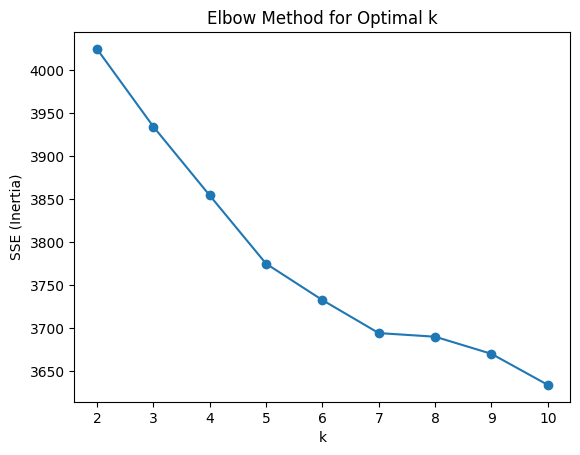

k=2, silhouette=0.041
k=3, silhouette=0.038
k=4, silhouette=0.046
k=5, silhouette=0.045
k=6, silhouette=0.042
k=7, silhouette=0.050
k=8, silhouette=0.034
k=9, silhouette=0.035
k=10, silhouette=0.043


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suppose df['skills'] has all skills combined as text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['total_skills'])

# Elbow Method
sse = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette={score:.3f}")


In [91]:
import numpy as np

optimal_k = 6  # (replace with the best one)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Map top features per cluster
terms = vectorizer.get_feature_names_out()
for i in range(optimal_k):
    center = kmeans.cluster_centers_[i]
    top_indices = center.argsort()[-10:][::-1]  # top 10
    top_terms = [terms[idx] for idx in top_indices]
    print(f"\nCluster {i}: {', '.join(top_terms)}")



Cluster 0: security, vulnerability, information, management, incident, cybersecurity, threat, siem, cyber, splunk

Cluster 1: js, react, development, css, javascript, web, cascading, style, sheets, redux

Cluster 2: development, management, programming, android, microsoft, language, design, java, software, data

Cluster 3: data, learning, language, machine, ai, programming, processing, analysis, deep, python

Cluster 4: data, microsoft, business, bi, sql, analysis, power, tableau, server, analytics

Cluster 5: spring, java, boot, development, programming, web, framework, microservices, core, sql


In [76]:
# Cluster	Interpretation	Description
# 0	🧠 General Software Developers	Broad mix: Java, Python, Android, Design → looks like junior or full-stack devs
# 1	🌐 Frontend Developers	Strong JS/React/CSS vibe — definitely UI developers
# 2	❓ Noise / Outlier Cluster	Non-English or mixed text (“高管行政协助”) — this might be bad data or mixed language profiles
# 3	🤖 Machine Learning / AI Engineers	Keywords: ML, deep, AI, processing — textbook data/ML cluster
# 4	📊 Data Analysts / BI Specialists	SQL, Tableau, Power BI, Analytics — business-focused data roles
# 5	☕ Backend Java Developers	Spring Boot, Microservices, Hibernate — pure backend stack
# 6	🔒 Cybersecurity Analysts	SIEM, Threat, Vulnerability, Cyber — security-oriented engineers

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fit TF-IDF on skill list
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['total_skills'])
skills_vocab = np.array(tfidf.get_feature_names_out())

def recommend_skills(input_skills, top_n=10):
    input_vec = tfidf.transform([input_skills])
    sims = cosine_similarity(input_vec, X).flatten()
    most_similar_idx = sims.argsort()[-5:][::-1]

    # Collect all skills from the top similar profiles
    similar_profiles = df.iloc[most_similar_idx]
    all_related_skills = " ".join(similar_profiles['total_skills'])
    related_vec = tfidf.transform([all_related_skills])

    # Compare input vs related to find missing ones
    input_terms = set(input_skills.lower().split(", "))
    all_terms = set(all_related_skills.lower().split(", "))
    recommended = list(all_terms - input_terms)

    return recommended[:top_n]

# Example use
recommend_skills("python, sql, data visualization")


['management',
 'tableau,sql,data visualization',
 'data science',
 'data modeling',
 'data analytics',
 'python (programming language)',
 'cloud computing',
 'communication',
 'presentations',
 'mysql']

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
# print(y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.96      0.99      0.97       383
           2       0.98      0.92      0.95       255
           3       0.96      0.98      0.97       220

    accuracy                           0.97       922
   macro avg       0.98      0.97      0.97       922
weighted avg       0.97      0.97      0.97       922



In [85]:
def recommend_cluster_skills(current_skills, target_cluster):
    input_vec = vectorizer.transform([current_skills])
    cluster_center = kmeans.cluster_centers_[target_cluster]
    terms = vectorizer.get_feature_names_out()
    top_indices = cluster_center.argsort()[-10:][::-1]
    top_terms = [terms[i] for i in top_indices]
    return list(set(top_terms) - set(current_skills.lower().split(", ")))

recommend_cluster_skills("python, sql, data visualization", target_cluster=2)


['tableau',
 'power',
 'microsoft',
 'bi',
 'data',
 'excel',
 'analysis',
 'management',
 'business']

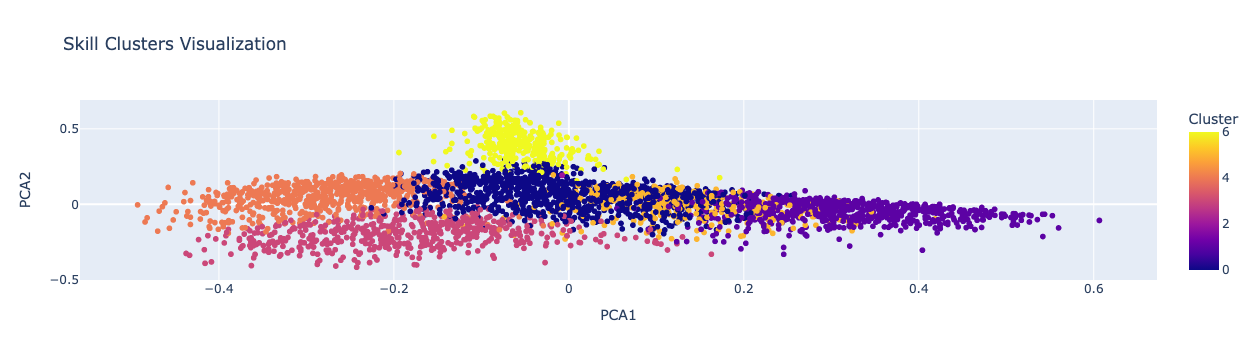

In [317]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X.toarray())

df_plot = pd.DataFrame({
    'PCA1': reduced[:, 0],
    'PCA2': reduced[:, 1],
    'Cluster': labels
})

fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Cluster', title="Skill Clusters Visualization")
fig.show()


In [92]:
df.head()

,current_position,current_company,years_of_experience,total_skills,education_degree,education_institution,certifications,city,state,country,profile_type,num_skills,skill_cluster,skills_emb
0,ML Engineer,Adobe,11.0,"Matlab, Electronics, C, C++, Electrical Engine...",Bachelor of Engineering (BE),Anna University,Unknown,Bengaluru,Karnataka,India,ML,19,4,"[-0.04844175, -0.0057044844, -0.00366883, -0.0..."
1,Machine Learning Engineer,Sarvam,7.0,"Artificial Intelligence (AI), Machine Learning...",BSc - Bachelor of Science,"St. Stephen's College, Delhi",4-Week Virtual Internship Program on Generativ...,Bengaluru,Karnataka,India,ML,23,4,"[-0.035300754, 0.011429758, -0.0013743709, 0.0..."
2,Python Software Developer,Wipzent,3.1,"Artificial Intelligence (AI), Django, Pandas (...",Bsc in data science,Techno India University,Unknown,Bengaluru,Karnataka,India,ML,11,4,"[-0.05864422, -0.0032778624, -0.0044696354, 0...."
3,Machine Learning Engineer,Smart Data Solutions,9.2,"Semantic Search, Model Selection, Decision-Mak...",Predictive Analytics for Business,Udacity,"SQL (Basic) Certificate, Databases for Develop...",Chennai,Tamil Nadu,India,ML,38,4,"[-0.09126565, -0.018919256, -0.009689967, 0.04..."
4,Director - Applied AI,Krutrim,15.6,"Coaching, Responsible AI, Analytical Skills, T...",Doctor of Philosophy (Ph.D.),Tampere University,"Neural Networks for Machine Learning, Machine ...",Bengaluru,Karnataka,India,ML,20,4,"[-0.06426062, -0.013957148, -0.010004171, 0.00..."


In [94]:
df.to_csv("combined2.csv", index=False)
